<a href="https://colab.research.google.com/github/alexanderbeat/mod5project/blob/master/ALEX_BEAT_v2_1mod5project_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - River Delta Satellite Image Classification

* Student name: Alex Beat
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Yish Lim
* Blog post URL: NA

# Overview

- Problem: A model is needed to help process the large amounts of raw Mars images.
- Business Value: This model will speed up the processing of Mars image data to help classify river delta patterns and aid scientists in honing in on locations that contain traces of existing or preexisting water on the planet.
- Other use cases: This model has the potential to also be tweaked for use with environmental cases on Earth, such as changes in river deltas over time regarding climate change, analysis for farming data, real estate and commercial building viability.

- Audience: Main audience is a space exploration company, with additional use in agricultural, real estate and environmental sectors depending how the model is adjusted to perform.

## Project Phase 1

This first part of the project covers processing and Earth land and river delta image tiles and training a model using those for the dataset. This starts as a basis for how the next phase will be performed, but in that next phase, a separate dataset of Mars image tiles will be used in place of the Earth tiles to train/test the model.

The Earth images obtained from Google are not the cleanest and contain many different artifacts such as text, drawings on the image, and some outlier images are not an exact match of being a satellite image, but were shown on the image search page based on how the Google Image Search algortithm worked. I kept the images all in the dataset for now, but in order to clean, will attempt to view misclassifed images and remove those from the original dataset permanently.

Will also plan to implement a supervised learning model into the mix as well in hopes of gaining other performance values along with a thorough grid search of hyperparameters.

### Model Performance


A convolutional neural network model with an RMSprop optimizer proved to have the highest performance with a classification accuracy of 91%. The precision was 98%, with a recall of 77% of the river delta labeled images. These scores seem a little too good to be true for now considering the lack of cleaner images, but it's a good springboard to work from.

## Project Phase 2

From there, the next step will be to obtain the Mars images and continue training and testing in in hopes of being able to identify river delta patterns from the Mars imagery. Obtaining these next Mars images through an API could give the possible opportunity of pairing the model classified river delta images with provided location coordinates through the API calls, and would then be able to return each classified river delta with its corresponding location on Mars. The benefit would be a machine learning model that will give scientists a head start on where to continue their search for other signs of pre-existence of water on Mars.

### Model Performance

Phase 2 performance details will be updated once Mars images are obtained from a scrape or more preferably, an API. 

## Content

The Earth dataset is organized into 2 folders (train, test) and contains subfolders for each image category (land, river Delta). There are 1,398 images (JPEG) and 2 categories. Image augmentation with generators was used to create a larger dataset of 2,232 images.

Images were obtained from Google Image searches, using Selenium to interactively scroll through the webpage and scrape them. The process is shown in the separate notebook in this repository called [selenium_image_scraper](https://github.com/alexanderbeat/mod5project/blob/master/selenium_image_scraper.ipynb).

# Select Colab directory and unzip virtually in colab.

This first section will help those who want to or need to run Keras and Tensorflow in Colab. I was forced to run my notebooks in the cloud using Colab because my OS was too old and wouldn't run the necesary versions of Keras. Working with Colab provides the advantage of GPU performance with image loading. Loading in the zip virtually will increase performance as the images will all be loaded in once, as opposed to reading in each image separately. This blog post was used to help load in your entire zip file: https://medium.com/datadriveninvestor/speed-up-your-image-training-on-google-colab-dc95ea1491cf

### Mount google drive connection to colab. 

In [1]:
from google.colab import drive

# choose your drive file path
drive.mount('/content/drive', force_remount=True)

# cd to the uppermost folder in gdrive where you will unzip your zip file and create a virtual version of the uncompressed zip
%cd ~
%cd ..

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/root
/


### Zip virtual copy, unzip, removal.

In [2]:
# variable for the path. I have a separate folder to keep all datasets on my Google Drive. 
zip_path = r'content/drive/My Drive/Datasets/sat_images.zip'

# copies the zip file
!cp "{zip_path}" .

# unzip file virtually in colab
!unzip -q sat_images.zip

# removes copied zip
!rm sat_images.zip

In [3]:
# check directory to see virtual files are in your main folder
# Notice that there is now a temporary sat_images file in the list of cwd files. 
import os
print('Current directory is at top level: ', os.path.abspath(os.curdir))
os.listdir()


Current directory is at top level:  /


['media',
 'sbin',
 'lib64',
 'usr',
 'run',
 'var',
 'opt',
 'lib',
 'mnt',
 'dev',
 'bin',
 'etc',
 'tmp',
 'sys',
 'home',
 'proc',
 'srv',
 'boot',
 'root',
 '__MACOSX',
 'content',
 'sat_images',
 '.dockerenv',
 'datalab',
 'tools',
 'swift',
 'tensorflow-1.15.2',
 'lib32']

# Obtain

Data is obtained using the [selenium_image_scraper](https://github.com/alexanderbeat/mod5project/blob/master/selenium_image_scraper.ipynb) notebook.

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(111)


## Define folder structure.

In [4]:
#  Set up directory paths from gdrive
train_dir_land = 'sat_images/train/land'
train_dir_delta = 'sat_images/train/river_delta'
test_dir_land = 'sat_images/test/land'
test_dir_delta = 'sat_images/test/river_delta'
all_dir_paths = [train_dir_land, train_dir_delta, test_dir_land,
                 test_dir_delta]

train_dir = 'sat_images/train'
test_dir = 'sat_images/test'

In [5]:
# use loop to get number of samples from all folders
for dataset in all_dir_paths: 
  print(f'There are {len(os.listdir(dataset))} images in {str(dataset)} folder.') 

There are 636 images in sat_images/train/land folder.
There are 411 images in sat_images/train/river_delta folder.
There are 213 images in sat_images/test/land folder.
There are 138 images in sat_images/test/river_delta folder.


### Class imbalance

Note that there is a decent class imbalance between the training set of 636 land tiles versus the 411 delta tiles. A similar imbalance occurs within the test image set too. This will lead higher scores for classifying land images overall. A good way to fix this issue will be to remove some of the images beforehand to balance them out, or possibly search for the misclassified land images after training and also remove those since the misclassified ones will most likely be from unclean images anyways and are not helping the dataset to begin with. 

## Functions

These functions were adapted from this Colab notebook about CNNs. https://colab.research.google.com/drive/1fwXPY3IDHxNiv7YgOpt3p5BvUaO4VruB?usp=sharing

In [12]:
from PIL import Image
from keras.preprocessing import image
from imageio import imread
from skimage.transform import resize
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from PIL import Image
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import itertools
import numpy as np


# final eval of model showing report, confusion matrix and acc/loss graphs
def evaluate_model(y_test, y_pred, model_history):
    """Takes in your y labels, y predictions, and model history.
        Returns a metric report, confusion matrix and plots for 
        accuracy and loss."""
    
    ## Classification Report / Scores 
    print(metrics.classification_report(y_test,y_pred))

    # confusion matrix
    fig, ax = plt.subplots(figsize=(12,6))
    cm = metrics.confusion_matrix(y_test, y_pred, normalize='true')

    # Add title and axis labels
    plt.imshow(cm, interpolation='nearest', cmap='Blues' )
    plt.title('Confusion Matrix. 0=Land, 1=River Delta')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Add appropriate axis scales
    class_names = set(y_test) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Add labels to each cell
    thresh = cm.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, round(cm[i, j], 2),
                    horizontalalignment='center',
                    color='white' if cm[i, j] > thresh else 'black')
    # color bar acts as a type of legend for the confusion matrix
    plt.colorbar()
    plt.show()


    # loss and acc plots
    fig, ax = plt.subplots(figsize=(12,6),ncols=2)

    train_acc = model_history.history['acc']
    val_acc = model_history.history['val_acc']
    train_loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']

    epochs = range(len(train_acc))
    ax[0].plot(epochs, train_acc, 'g', label='Training acc')
    ax[0].plot(epochs, val_acc, 'b', label='Val acc')
    ax[0].legend()

    ax[1].plot(epochs, train_loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'b', label='Val loss')
    ax[1].legend()

    ax[0].set(title='Training and Val accuracy')
    ax[1].set(title='Training and Val loss')
    
    plt.tight_layout()
    plt.show()


## Load images

In [7]:
# create train set generator
train_datagen_1 = ImageDataGenerator(rescale = 1./255,
                                       shear_range = 0.2, 
                                        zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2,
                                    rotation_range=40, 
                                   width_shift_range=0.2, 
                                   fill_mode='nearest')

train_datagen_2 = ImageDataGenerator(rescale = 1./255,
                                       shear_range = 0.2, 
                                        zoom_range = 0.2,
                                   horizontal_flip = True,
                                    rotation_range=-40, 
                                   height_shift_range=0.2, 
                                   fill_mode='reflect')                                   

# create test set generator
test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
# pulls training images from file path, creates a trainings subset and a val subset 
# in the following flow. Class mode is set to binary for labeling. 
training_set_1 = train_datagen_1.flow_from_directory(train_dir, batch_size=837,
                                                 seed=1,subset='training', 
                                                 target_size=(128,128),
                                                 class_mode='binary')
training_set_2 = train_datagen_2.flow_from_directory(train_dir, batch_size=837,
                                                 seed=1,subset='training', 
                                                 target_size=(128,128),
                                                 class_mode='binary')
val_set = train_datagen_1.flow_from_directory(train_dir, batch_size=209,
                                            seed=1,subset='validation',
                                            target_size=(128,128),
                                            class_mode='binary')

# same thing but for a separate test set of images. 
test_set = test_datagen.flow_from_directory(test_dir, batch_size=349,
                                            target_size=(128,128),
                                            class_mode='binary')



Found 837 images belonging to 2 classes.
Found 1046 images belonging to 2 classes.
Found 209 images belonging to 2 classes.
Found 349 images belonging to 2 classes.


In [9]:
print('Training set shape ', training_set_1[0][0].shape)


Training set shape  (837, 128, 128, 3)


In [10]:
x_train, y_train = next(training_set_1)
x_train2, y_train2 = next(training_set_2)
x_test, y_test = next(test_set)
x_val, y_val = next(val_set)

In [13]:
#combine results of the generation
x_train= np.concatenate([x_train,x_train2])
y_train = np.concatenate([y_train,y_train2])

In [14]:
len(x_train)

1674

In [15]:
x_train.shape

(1674, 128, 128, 3)

# Scrub/Explore

## Step 2: EDA and Visualization

### View an image

Test to view an image using filename to make sure they loaded into notebook correctly. 

In [16]:
import glob

# use glob to get filenames of all images in each folder
train_files_land = glob.glob(train_dir_land+'/*.jpeg')
train_files_delta = glob.glob(train_dir_delta+'/*.jpeg')
all_train_files = [*train_files_land,*train_files_delta]

test_files_land = glob.glob(test_dir_land+'/*.jpeg')
test_files_delta = glob.glob(test_dir_delta+'/*.jpeg')
all_test_files = [*test_files_land,*test_files_delta]

Notice on the images below to see what I mean about images containing artifacts, such as the text, boxes, and drawings on them. These are causing the image set to be dirty, because it was a basic scrape from a Google Image search with no control over their search algorithms. A cleaner dataset should prove to be better performing once obtained. 

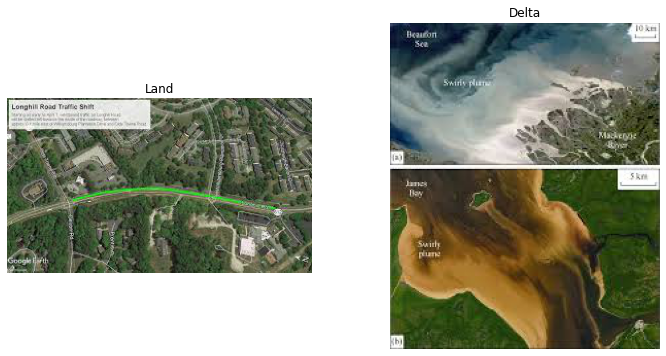

In [ ]:
# view a regular image file
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

file_land = train_files_land[1] # uses first normal filename from glob list
file_delta = train_files_delta[1] # uses first pneumonia filename from glob list

img_L = image.load_img(file_land)
img_D = image.load_img(file_delta)

# need subplot titles and each plot still
fig, ax = plt.subplots(figsize=(12,6),ncols=2)


ax[0].imshow(img_L)
ax[0].set(title='Land')
ax[0].axis('off')

ax[1].imshow(img_D)
ax[1].set(title='Delta')
ax[1].axis('off')
plt.show()


Test to view image as a tensor array. 

(1, 128, 128, 3)


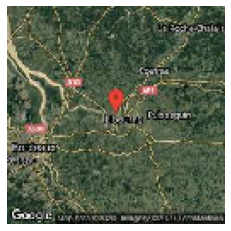

In [17]:
import numpy as np

feature_img = train_files_land[1] # uses a land filename from glob list

f_img = image.load_img(feature_img, target_size=(128,128))

# view as a tensor image
img_tensor = image.img_to_array(f_img)
img_tensor = np.expand_dims(img_tensor, axis=0)

# Follow the Original Model Preprocessing
img_tensor /= 255.

# Check tensor shape
print(img_tensor.shape)

# Preview an image
plt.imshow(img_tensor[0])
plt.axis('off')
plt.show()

# Model

## BUILD BASELINE CNN

In [66]:
np.random.seed(111)
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
import datetime
from keras.callbacks import EarlyStopping



# timer for model
original_start = datetime.datetime.now()
start = datetime.datetime.now()

# Initialising the CNN
model = Sequential()

# Step 1 - Convolution
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128,  3)))
# Step 2 - Pooling
model.add(layers.MaxPooling2D((2, 2)))

# Adding a second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(128, 128,  3)))
# Pooling
model.add(layers.MaxPooling2D((2, 2)))

# Adding a third convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(128, 128,  3)))
# Pooling
model.add(layers.MaxPooling2D((2, 2)))

# Step 3 - Flattening
model.add(layers.Flatten())

# Step 4 - Full connection
model.add(layers.Dense(units = 512, activation = 'relu'))

model.add(layers.Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
model.compile(optimizer = 'sgd', 
                   loss = 'binary_crossentropy',
                   metrics = ['acc'])
print()
display(model.summary())

# Define the callbacks for early stopping of model based on val loss change.
early_stopping = [EarlyStopping(monitor='val_loss', min_delta= 0.01, patience=10)]
                

# Fitting the CNN to the images using fit
history = model.fit(x_train, y_train,
                             steps_per_epoch = 1674,
                             epochs = 100,
                            callbacks=early_stopping,
                             validation_data = (x_val, y_val),
                            #  validation_steps =100, 
                              verbose=1, workers=-1)
# end timer
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))                              


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 25088)           

None

Epoch 1/100
1674/1674 [==============================] - 6s 3ms/step - loss: 0.5052 - acc: 0.7569 - val_loss: 0.3159 - val_acc: 0.8947
Epoch 2/100
1674/1674 [==============================] - 5s 3ms/step - loss: 0.3586 - acc: 0.8542 - val_loss: 0.2550 - val_acc: 0.9091
Epoch 3/100
1674/1674 [==============================] - 5s 3ms/step - loss: 0.3139 - acc: 0.8805 - val_loss: 0.2450 - val_acc: 0.8995
Epoch 4/100
1674/1674 [==============================] - 5s 3ms/step - loss: 0.3005 - acc: 0.8943 - val_loss: 0.2102 - val_acc: 0.9234
Epoch 5/100
1674/1674 [==============================] - 5s 3ms/step - loss: 0.2703 - acc: 0.8990 - val_loss: 0.2014 - val_acc: 0.9282
Epoch 6/100
1674/1674 [==============================] - 5s 3ms/step - loss: 0.2610 - acc: 0.9032 - val_loss: 0.2826 - val_acc: 0.8900
Epoch 7/100
1674/1674 [==============================] - 5s 3ms/step - loss: 0.2543 - acc: 0.9050 - val_loss: 0.1900 - val_acc: 0.9378
Epoch 8/100
1674/1674 [==============================] 

In [67]:
# training loss and accuracy used in model
train_loss, train_acc = model.evaluate(x_train, y_train)
print('train acc:', train_acc)
print('train loss:', train_loss)


53/53 [==============================] - 0s 8ms/step - loss: 0.0423 - acc: 0.9863
train acc: 0.9862604737281799
train loss: 0.042252931743860245


In [68]:
# val loss and accuracy used in model
val_loss, val_acc = model.evaluate(x_val, y_val)
print('validation acc:', val_acc)
print('validation loss:', val_loss)


7/7 [==============================] - 0s 5ms/step - loss: 0.2568 - acc: 0.9330
validation acc: 0.9330143332481384
validation loss: 0.25677528977394104


In [69]:
# unseen test data for data leak prevention to check loss and accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test acc:', test_acc)
print('test loss:', test_loss)


11/11 [==============================] - 0s 6ms/step - loss: 0.2971 - acc: 0.9169
test acc: 0.9169054627418518
test loss: 0.2971099019050598


In [ ]:
# # Your code here; save the model for future reference 
# model.save('baseline_model.h5')


### Interpreting Results

Training accuracy 99%. Test accuracy at 92% and loss at 30%. Precision - 90%, recall is 88%, F1 score 89.

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       212
         1.0       0.90      0.88      0.89       137

    accuracy                           0.92       349
   macro avg       0.91      0.91      0.91       349
weighted avg       0.92      0.92      0.92       349



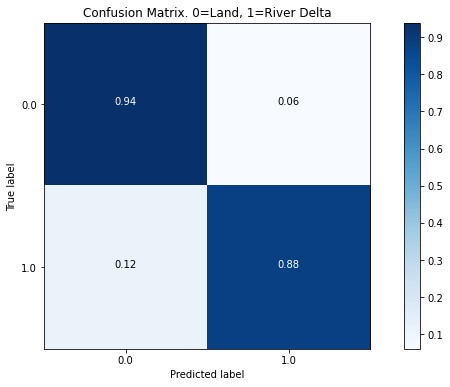

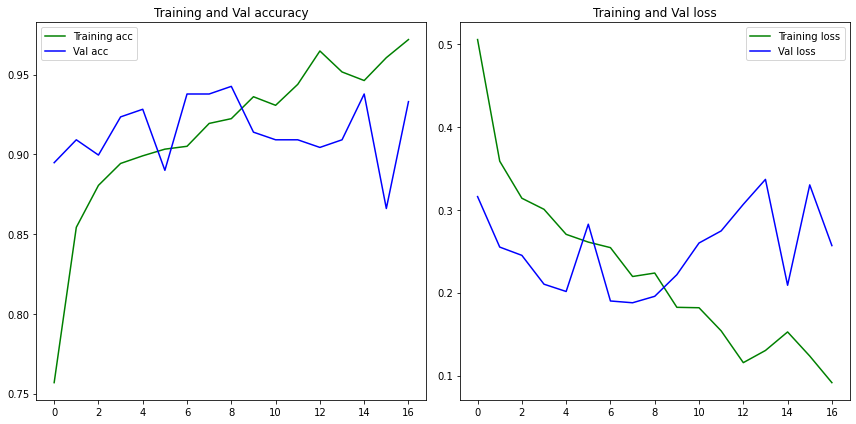

In [70]:
y_preds = model.predict_classes(x_test).flatten()

evaluate_model(y_test,y_preds,history)


# Explore

## Visualize Feature Map Layers

This will help show you what's happening with the images after each layer of the model network and how the patterns are developed. 

In [23]:
from keras import models
import math 

# Extract model layer outputs
layer_outputs = [layer.output for layer in model.layers[:6]]

# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0

(1, 126, 126, 32)


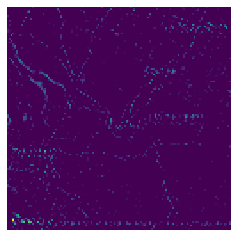

In [26]:
# Returns an array for each activation layer
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

# We slice the third channel and preview the results
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.axis('off')
plt.show()

REPEAT FOR ALL LAYERS

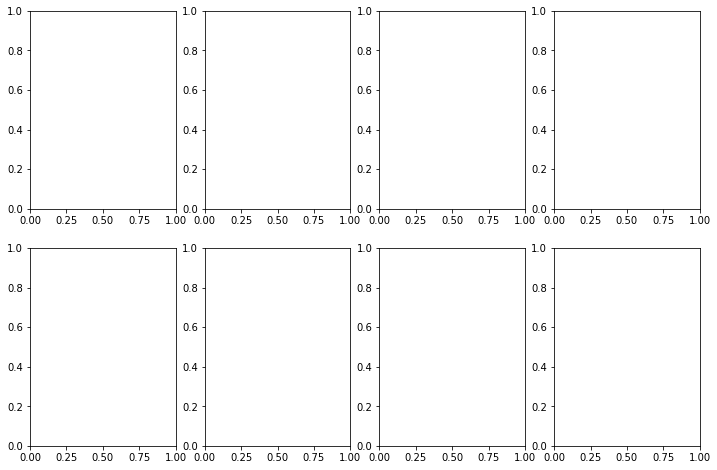

In [30]:
layer_names = []
for layer in model.layers[:6]:
    layer_names.append(layer.name)



In [31]:
len(layer_names)

6

conv2d


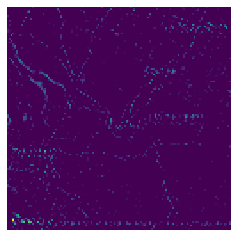

max_pooling2d


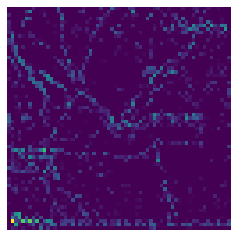

conv2d_1


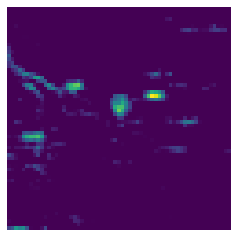

max_pooling2d_1


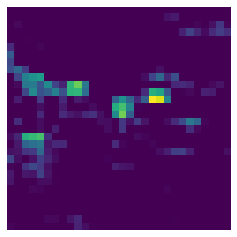

conv2d_2


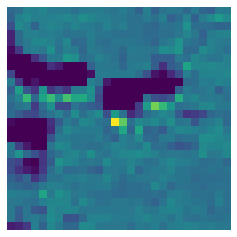

max_pooling2d_2


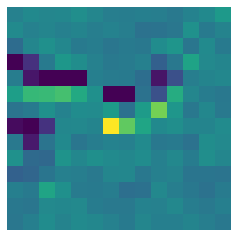

In [42]:
for i in range(6):
    print(layer_names[i])
    cur_layer = activations[i]
    plt.matshow(cur_layer[0, :, :, 3], cmap='viridis')
    plt.axis('off')
    plt.show()

# Model Hyperparams Updates

## Second model with RMSprop

In [99]:
np.random.seed(111)
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
import datetime
from keras.callbacks import EarlyStopping



# timer for model
original_start = datetime.datetime.now()
start = datetime.datetime.now()

# Initialising the CNN
rms_model = Sequential()

# Step 1 - Convolution
rms_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128,  3)))
# Step 2 - Pooling
rms_model.add(layers.MaxPooling2D((2, 2)))

# Adding a second convolutional layer
rms_model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(128, 128,  3)))
# Pooling
rms_model.add(layers.MaxPooling2D((2, 2)))

# Adding a third convolutional layer
rms_model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(128, 128,  3)))
# Pooling
rms_model.add(layers.MaxPooling2D((2, 2)))

# Step 3 - Flattening
rms_model.add(layers.Flatten())

# Step 4 - Full connection
rms_model.add(layers.Dense(units = 512, activation = 'relu'))

rms_model.add(layers.Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
rms_model.compile(optimizer = 'rmsprop', 
                   loss = 'binary_crossentropy',
                   metrics = ['acc'])
print()
display(rms_model.summary())

# Define the callbacks for early stopping of model based on val loss change.
# early_stopping = [EarlyStopping(monitor='val_loss', min_delta= 0.0001, patience=10)]
                

# Fitting the CNN to the images using fit
rms_history = rms_model.fit(x_train, y_train,
                             steps_per_epoch = 1674,
                             epochs = 80,
                            # callbacks=early_stopping,
                             validation_data = (x_val, y_val),
                            #  validation_steps =100, 
                              verbose=1, workers=-1)
# end timer
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))                              


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 25088)          

None

Epoch 1/80
1674/1674 [==============================] - 13s 8ms/step - loss: 0.5657 - acc: 0.7975 - val_loss: 0.2357 - val_acc: 0.9426
Epoch 2/80
1674/1674 [==============================] - 12s 7ms/step - loss: 0.4529 - acc: 0.8489 - val_loss: 0.2639 - val_acc: 0.9091
Epoch 3/80
1674/1674 [==============================] - 12s 7ms/step - loss: 0.4572 - acc: 0.8668 - val_loss: 0.2196 - val_acc: 0.9330
Epoch 4/80
1674/1674 [==============================] - 12s 7ms/step - loss: 0.4473 - acc: 0.8680 - val_loss: 0.3184 - val_acc: 0.8947
Epoch 5/80
1674/1674 [==============================] - 12s 7ms/step - loss: 0.4407 - acc: 0.8668 - val_loss: 0.2714 - val_acc: 0.9187
Epoch 6/80
1674/1674 [==============================] - 12s 7ms/step - loss: 0.4803 - acc: 0.8793 - val_loss: 0.1741 - val_acc: 0.9330
Epoch 7/80
1674/1674 [==============================] - 12s 7ms/step - loss: 0.5085 - acc: 0.8746 - val_loss: 0.2159 - val_acc: 0.9139
Epoch 8/80
1674/1674 [==============================] -

In [100]:
# training loss and accuracy used in model
train_loss, train_acc = rms_model.evaluate(x_train, y_train)
print('train acc:', train_acc)
print('train loss:', train_loss)


53/53 [==============================] - 0s 6ms/step - loss: 0.8750 - acc: 0.7897
train acc: 0.7897251844406128
train loss: 0.8750121593475342


In [101]:
# val loss and accuracy used in model
val_loss, val_acc = rms_model.evaluate(x_val, y_val)
print('validation acc:', val_acc)
print('validation loss:', val_loss)


7/7 [==============================] - 0s 5ms/step - loss: 0.3219 - acc: 0.8086
validation acc: 0.8086124658584595
validation loss: 0.3218633234500885


In [102]:
# unseen test data for data leak prevention to check loss and accuracy
test_loss, test_acc = rms_model.evaluate(x_test, y_test)
print('test acc:', test_acc)
print('test loss:', test_loss)


11/11 [==============================] - 0s 6ms/step - loss: 1.4456 - acc: 0.8138
test acc: 0.813753604888916
test loss: 1.445574164390564


HOW TO SAVE h5 model

In [103]:
# # Your code here; save the model for future reference 
# model.save('chest_xray_downsampled_data.h5')


HOW TO LOAD A PREVIOUS SAVED h5 model

In [104]:
# from keras.models import load_model

# model = load_model('chest_xray_all_data.h5')
# # As a reminder 
# model.summary()  

### Interpreting Results

Training accuracy 79%. Test accuracy at 81% and loss at 145%. Precision - 99%, recall is 53%. F1 score 69.

              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87       212
         1.0       0.99      0.53      0.69       137

    accuracy                           0.81       349
   macro avg       0.88      0.76      0.78       349
weighted avg       0.85      0.81      0.80       349



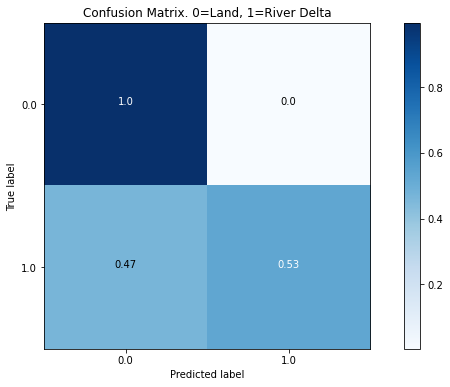

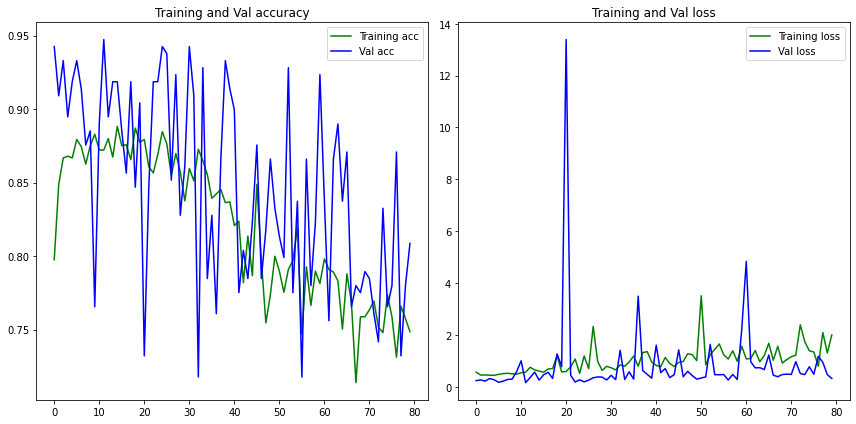

In [105]:
y_preds = rms_model.predict_classes(x_test).flatten()

evaluate_model(y_test,y_preds,rms_history)


## Third model with ADAM

In [78]:
np.random.seed(111)
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
import datetime
from keras.callbacks import EarlyStopping



# timer for model
original_start = datetime.datetime.now()
start = datetime.datetime.now()

# Initialising the CNN
adam_model = Sequential()

# Step 1 - Convolution
adam_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128,  3)))
# Step 2 - Pooling
adam_model.add(layers.MaxPooling2D((2, 2)))

# Adding a second convolutional layer
adam_model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(128, 128,  3)))
# Pooling
adam_model.add(layers.MaxPooling2D((2, 2)))

# Adding a third convolutional layer
adam_model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(128, 128,  3)))
# Pooling
adam_model.add(layers.MaxPooling2D((2, 2)))

# Step 3 - Flattening
adam_model.add(layers.Flatten())

# Step 4 - Full connection
adam_model.add(layers.Dense(units = 512, activation = 'relu'))

adam_model.add(layers.Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
adam_model.compile(optimizer = 'adam', 
                   loss = 'binary_crossentropy',
                   metrics = ['acc'])
print()
display(adam_model.summary())

# Define the callbacks for early stopping of model based on val loss change.
early_stopping = [EarlyStopping(monitor='val_loss', min_delta= 0.01, patience=10)]
                

# Fitting the CNN to the images using fit
adam_history = adam_model.fit(x_train, y_train,
                             steps_per_epoch = 1674,
                             epochs = 100,
                            callbacks=early_stopping,
                             validation_data = (x_val, y_val),
                            #  validation_steps =100, 
                              verbose=1, workers=-1)
# end timer
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))                              


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 25088)           

None

Epoch 1/100
1674/1674 [==============================] - 8s 5ms/step - loss: 0.6707 - acc: 0.6750 - val_loss: 0.5910 - val_acc: 0.8421
Epoch 2/100
1674/1674 [==============================] - 7s 4ms/step - loss: 0.4992 - acc: 0.7796 - val_loss: 0.3371 - val_acc: 0.8373
Epoch 3/100
1674/1674 [==============================] - 7s 4ms/step - loss: 0.3819 - acc: 0.8465 - val_loss: 0.4402 - val_acc: 0.7656
Epoch 4/100
1674/1674 [==============================] - 7s 4ms/step - loss: 0.3238 - acc: 0.8698 - val_loss: 0.2314 - val_acc: 0.9234
Epoch 5/100
1674/1674 [==============================] - 8s 4ms/step - loss: 0.2918 - acc: 0.8865 - val_loss: 0.1946 - val_acc: 0.9282
Epoch 6/100
1674/1674 [==============================] - 7s 4ms/step - loss: 0.2897 - acc: 0.8883 - val_loss: 0.2925 - val_acc: 0.8708
Epoch 7/100
1674/1674 [==============================] - 8s 5ms/step - loss: 0.2807 - acc: 0.8919 - val_loss: 0.1926 - val_acc: 0.9378
Epoch 8/100
1674/1674 [==============================] 

In [79]:
# training loss and accuracy used in model
train_loss, train_acc = adam_model.evaluate(x_train, y_train)
print('train acc:', train_acc)
print('train loss:', train_loss)


53/53 [==============================] - 0s 6ms/step - loss: 0.1027 - acc: 0.9630
train acc: 0.9629629850387573
train loss: 0.10267329961061478


In [80]:
# val loss and accuracy used in model
val_loss, val_acc = adam_model.evaluate(x_val, y_val)
print('validation acc:', val_acc)
print('validation loss:', val_loss)


7/7 [==============================] - 0s 5ms/step - loss: 0.4000 - acc: 0.9234
validation acc: 0.9234449863433838
validation loss: 0.40003854036331177


In [81]:
# unseen test data for data leak prevention to check loss and accuracy
test_loss, test_acc = adam_model.evaluate(x_test, y_test)
print('test acc:', test_acc)
print('test loss:', test_loss)


11/11 [==============================] - 0s 6ms/step - loss: 0.5168 - acc: 0.8883
test acc: 0.8882521390914917
test loss: 0.5167551040649414


### Interpreting Results

Training accuracy 96%. Test accuracy at 89% and loss at 52%. Precision - 81%, recall is 93%, F1 score 87.

              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90       212
         1.0       0.81      0.93      0.87       137

    accuracy                           0.89       349
   macro avg       0.88      0.90      0.89       349
weighted avg       0.90      0.89      0.89       349



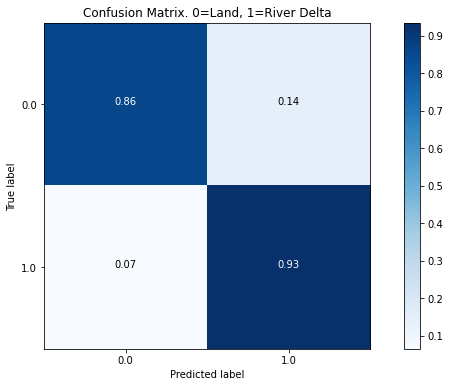

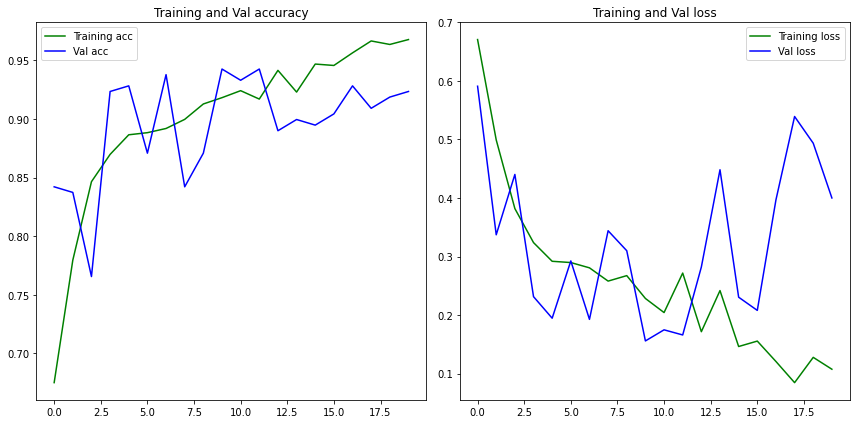

In [82]:
y_preds = adam_model.predict_classes(x_test).flatten()

evaluate_model(y_test,y_preds,adam_history)


## Compare Model Results

- baseline sgd
Training accuracy 99%. Test accuracy at 92% and loss at 30%. Precision - 90%, recall is 88%, F1 score 89.
- rmsprop
Training accuracy 79%. Test accuracy at 81% and loss at 145%. Precision - 99%, recall is 53%. F1 score 69.
- adam
Training accuracy 96%. Test accuracy at 89% and loss at 52%. Precision - 81%, recall is 93%, F1 score 87.

Best model so far was baseline sgd with 92% accuracy and a precision of 90%, recall of 88%. I'm going to move forward with this and add dropout.

## Fourth model with SGD. Add Dropout. 

In [118]:
np.random.seed(111)
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
import datetime
from keras.callbacks import EarlyStopping



# timer for model
original_start = datetime.datetime.now()
start = datetime.datetime.now()

# Initialising the CNN
drop_model = Sequential()

# Step 1 - Convolution
drop_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128,  3)))
# Step 2 - Pooling
drop_model.add(layers.MaxPooling2D((2, 2)))

# Adding a second convolutional layer
drop_model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(128, 128,  3)))
# Pooling
drop_model.add(layers.MaxPooling2D((2, 2)))

# Adding a third convolutional layer
drop_model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(128, 128,  3)))
# Pooling
drop_model.add(layers.MaxPooling2D((2, 2)))

# Step 3 - Flattening
drop_model.add(layers.Flatten())

# Step 4 - Full connection
drop_model.add(layers.Dense(units = 128, activation = 'relu'))

# Dropout applied to the full connection layer
drop_model.add(layers.Dropout(0.3))

# Step 5 - Full connection
drop_model.add(layers.Dense(units = 512, activation = 'relu'))

# output
drop_model.add(layers.Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
drop_model.compile(optimizer = 'sgd', 
                   loss = 'binary_crossentropy',
                   metrics = ['acc'])
print()
display(drop_model.summary())

# Define the callbacks for early stopping of model based on val loss change.
# early_stopping = [EarlyStopping(monitor='val_loss', min_delta= 0.01, patience=10)]
                

# Fitting the CNN to the images using fit
drop_history = drop_model.fit(x_train, y_train,
                             steps_per_epoch = 1674,
                             epochs = 20,
                            # callbacks=early_stopping,
                             validation_data = (x_val, y_val),
                            #  validation_steps =100, 
                              verbose=1, workers=-1)
# end timer
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))                              


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 25088)          

None

Epoch 1/20
1674/1674 [==============================] - 4s 3ms/step - loss: 0.5778 - acc: 0.7133 - val_loss: 0.3246 - val_acc: 0.8947
Epoch 2/20
1674/1674 [==============================] - 4s 2ms/step - loss: 0.4176 - acc: 0.8250 - val_loss: 0.2953 - val_acc: 0.9091
Epoch 3/20
1674/1674 [==============================] - 4s 2ms/step - loss: 0.3556 - acc: 0.8519 - val_loss: 0.2733 - val_acc: 0.9091
Epoch 4/20
1674/1674 [==============================] - 4s 2ms/step - loss: 0.3233 - acc: 0.8710 - val_loss: 0.2170 - val_acc: 0.9139
Epoch 5/20
1674/1674 [==============================] - 4s 3ms/step - loss: 0.3239 - acc: 0.8769 - val_loss: 0.2005 - val_acc: 0.9378
Epoch 6/20
1674/1674 [==============================] - 4s 3ms/step - loss: 0.2984 - acc: 0.8853 - val_loss: 0.1739 - val_acc: 0.9378
Epoch 7/20
1674/1674 [==============================] - 4s 2ms/step - loss: 0.2842 - acc: 0.8907 - val_loss: 0.2108 - val_acc: 0.9234
Epoch 8/20
1674/1674 [==============================] - 4s 2ms

In [119]:
# training loss and accuracy used in model
train_loss, train_acc = drop_model.evaluate(x_train, y_train)
print('train acc:', train_acc)
print('train loss:', train_loss)


53/53 [==============================] - 0s 6ms/step - loss: 0.0811 - acc: 0.9671
train acc: 0.9671445488929749
train loss: 0.08105865865945816


In [120]:
# val loss and accuracy used in model
val_loss, val_acc = drop_model.evaluate(x_val, y_val)
print('validation acc:', val_acc)
print('validation loss:', val_loss)


7/7 [==============================] - 0s 5ms/step - loss: 0.2456 - acc: 0.9234
validation acc: 0.9234449863433838
validation loss: 0.24557256698608398


In [121]:
# unseen test data for data leak prevention to check loss and accuracy
test_loss, test_acc = drop_model.evaluate(x_test, y_test)
print('test acc:', test_acc)
print('test loss:', test_loss)


11/11 [==============================] - 0s 6ms/step - loss: 0.2931 - acc: 0.9026
test acc: 0.9025787711143494
test loss: 0.29313525557518005



### Interpreting Results

Training accuracy 97%. Test accuracy at 90% and loss at 29%. Precision - 88%, recall 87%, F1 score 87.  


              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       212
         1.0       0.88      0.87      0.87       137

    accuracy                           0.90       349
   macro avg       0.90      0.90      0.90       349
weighted avg       0.90      0.90      0.90       349



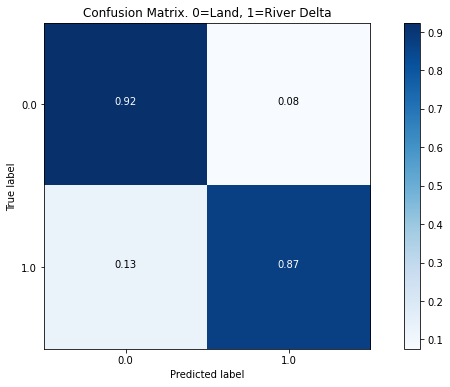

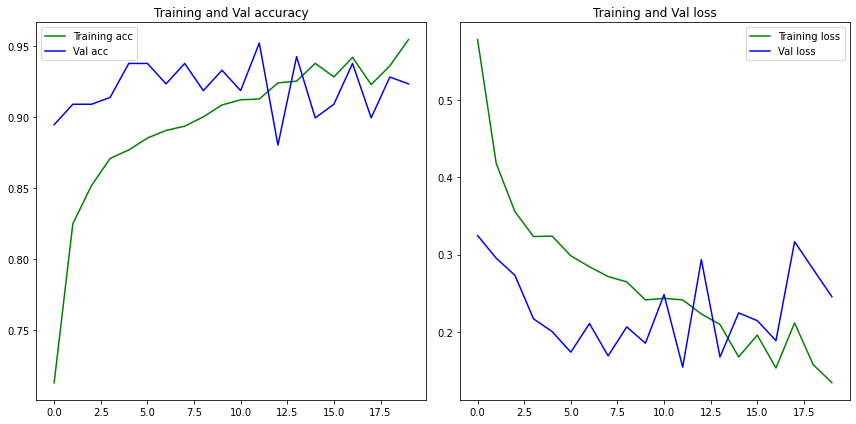

In [122]:
y_preds = drop_model.predict_classes(x_test).flatten()

evaluate_model(y_test,y_preds,drop_history)


# Compare model results

In [123]:
print('baseline model')
y_preds = model.predict_classes(x_test).flatten()
print(metrics.classification_report(y_test, y_preds))
'\n'
print('baseline model with dropout')
dropout_y_preds = drop_model.predict_classes(x_test).flatten()
print(metrics.classification_report(y_test, dropout_y_preds))

baseline model
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       212
         1.0       0.90      0.88      0.89       137

    accuracy                           0.92       349
   macro avg       0.91      0.91      0.91       349
weighted avg       0.92      0.92      0.92       349

baseline model with dropout
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       212
         1.0       0.88      0.87      0.87       137

    accuracy                           0.90       349
   macro avg       0.90      0.90      0.90       349
weighted avg       0.90      0.90      0.90       349



Results: The baseline model with no dropout was better by only a slight amount with an accuracy of 92% compared to the dropout model's 90%. But the dropout model helps with overfitting even if the scores drop a little. 

# Explore

## View correct and incorrect classes

In [ ]:
# #check how many classified and misclassified for this model
# classified = []
# misclassified = []

# for x,y,z in zip(X_test, y_test, predictions_dropout):
#   if y != z:
#     misclassified.append((x,y,z))
#   else:
#     classified.append((x,y,z))

# len(classified),len(misclassified)

# Interpret - Conclusion Summary

Based on the final model with dropout, it seems the process was able to classify 87% recall of the river delta images. 

Precision on this model is 88%, which is good. But not as great as the images are known to contain artifacts, innaccuracies and are not clean. 

Updates to improve model performance: 
- Visualize misclassified images, remove those to better clean the dataset.
- Obtain new datasets with cleaner images, less text artifacts, less outliers.
- Obtain more images to have a bigger dataset. 
- Obtain the dataset to move this projec to its next phase.
- Fix class imbalance. 

Other possible use cases:
- This model has the potential to also be tweaked for use with environmental cases on Earth, such as changes in river deltas over time regarding climate change, analysis for farming data, animal habitat, real estate and commercial building viability. 

